# SHAP Analysis for Model Interpretability
This notebook demonstrates how to use SHAP (SHapley Additive exPlanations) to interpret the predictions of machine learning models for customer churn. We will visualize feature importance and explain individual predictions.

In [11]:
# Import required libraries
import pandas as pd
import numpy as np
import shap
import pickle
import matplotlib.pyplot as plt
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

## 1. Load Data and Model
We will use the processed data and a trained XGBoost model for SHAP analysis.

In [12]:
# Load processed data
processed = pd.read_csv('../data/processed/processed.csv')
X = processed.drop('Churn', axis=1)
y = processed['Churn']

# Load trained XGBoost model
with open('../models/xgboost.pkl', 'rb') as f:
    model = pickle.load(f)

## 2. SHAP Explainer Setup
Create a SHAP explainer for the XGBoost model.

In [13]:
# Create SHAP explainer
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

## 3. Global Feature Importance
Visualize which features are most important for the model's predictions.

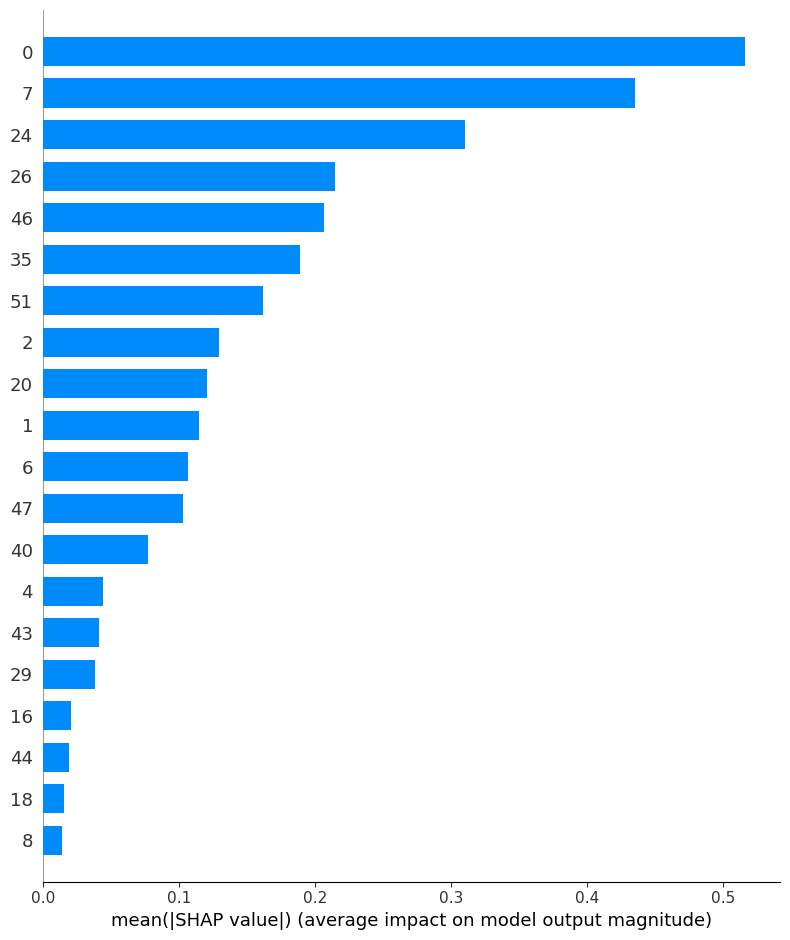

In [14]:
# SHAP summary plot (global feature importance)
shap.summary_plot(shap_values, X, plot_type='bar')

## 4. SHAP Summary Plot (Distribution)
See how each feature impacts the model output across all samples.

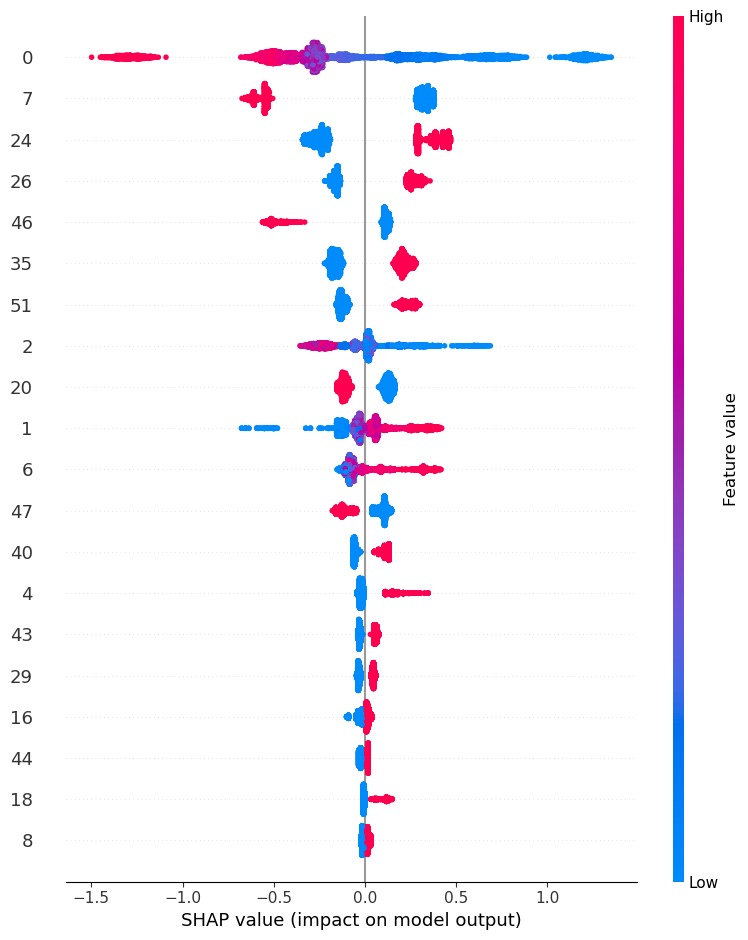

In [15]:
# SHAP summary plot (distribution)
shap.summary_plot(shap_values, X)

## 5. Explain Individual Predictions
Visualize SHAP values for a single prediction to understand why the model made a specific decision.

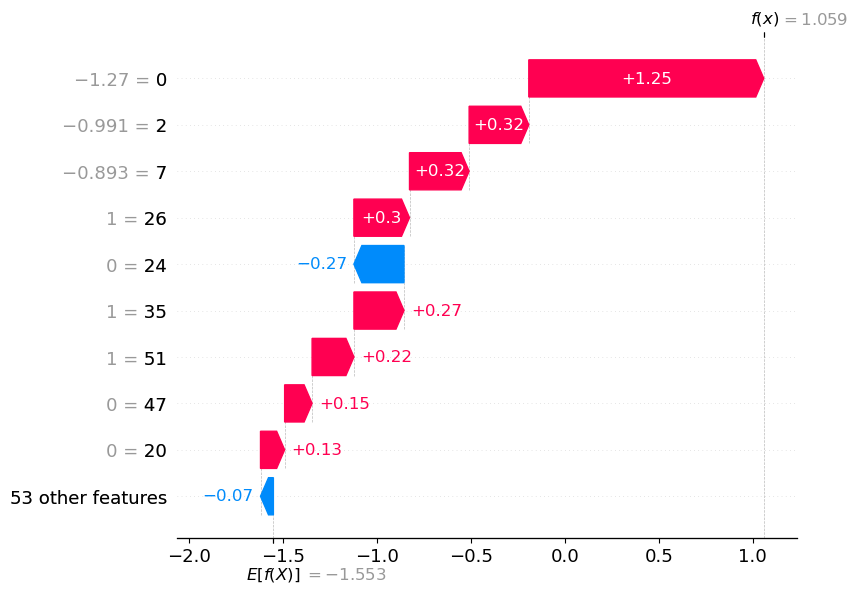

In [16]:
# Explain a single prediction (e.g., first sample)
sample_idx = 0
shap.plots.waterfall(shap_values[sample_idx], max_display=10)

## 6. Insights from SHAP Analysis
- The summary bar plot shows the most influential features for churn prediction.
- The distribution plot reveals how feature values affect the likelihood of churn.
- Waterfall plots for individual samples help explain specific model decisions, increasing trust and transparency.
- Use these insights to refine features, communicate results, and support business decisions.

## 7. SHAP for Other Models
SHAP can be used to interpret other models such as Random Forest and Logistic Regression. Below, we demonstrate SHAP analysis for these models.

In [17]:
# Load Random Forest and Logistic Regression models
with open('../models/random_forest.pkl', 'rb') as f:
    rf_model = pickle.load(f)
with open('../models/logistic_regression.pkl', 'rb') as f:
    lr_model = pickle.load(f)

### SHAP for Random Forest
We use TreeExplainer for Random Forest models.

In [ ]:
# SHAP for Random Forest
rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer.shap_values(X)
# Handle both list and array outputs for binary classification
if isinstance(rf_shap_values, list):
    shap.summary_plot(rf_shap_values[1], X, plot_type='bar')
    shap.summary_plot(rf_shap_values[1], X)
else:
    shap.summary_plot(rf_shap_values, X, plot_type='bar')
    shap.summary_plot(rf_shap_values, X)

### SHAP for Logistic Regression
We use Explainer for Logistic Regression models.

In [ ]:
# SHAP for Logistic Regression
lr_explainer = shap.Explainer(lr_model, X)
lr_shap_values = lr_explainer(X)
shap.summary_plot(lr_shap_values, X, plot_type='bar')
shap.summary_plot(lr_shap_values, X)

### Notes
- TreeExplainer is efficient for tree-based models (Random Forest, XGBoost).
- Explainer is suitable for Logistic Regression.
- KernelExplainer can be used for any model but is slower.
- SHAP provides consistent interpretability across different model types.